# Install Required Packages

In [ ]:
!python --version

Python 3.9.16


In [ ]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 107.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    

In [ ]:
!pip install tensorflow-quantum==0.7.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 576.5/576.5 kB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
# Update package resources to account for version changes.
import importlib, pkg_resources
importlib.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py'>

# Import Packages

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_quantum as tfq

import cirq
import sympy
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

In [ ]:
(x_training, y_training), (x_testing, y_testing) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_training, x_testing = x_training[..., np.newaxis]/255.0, x_testing[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_training))
print("Number of original testing examples:", len(x_testing))

11501568/11490434 [==============================] - 1s 0us/step
Number of original training examples: 60000
Number of original testing examples: 10000


In [ ]:
def filter_07(r, n):
    keep = (n == 0) | (n == 7)
    r, n = r[keep], n[keep]
    n = n == 0
    return r,n

In [ ]:
x_training_07, y_training_07 = filter_07(x_training, y_training)
x_testing_07, y_testing_07 = filter_07(x_testing, y_testing)

print("Number of filtered training examples:", len(x_training_07))
print("Number of filtered testing examples:", len(x_testing_07))

Number of filtered training examples: 12188
Number of filtered testing examples: 2008


True


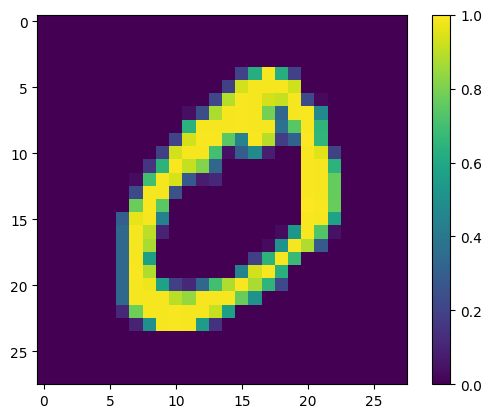

In [ ]:
print(y_training_07[0])

plt.imshow(x_training_07[0, :, :, 0])
plt.colorbar()

In [ ]:
x_train_sized = tf.image.resize(x_training_07, (4,4)).numpy()
x_test_sized = tf.image.resize(x_testing_07, (4,4)).numpy()

True


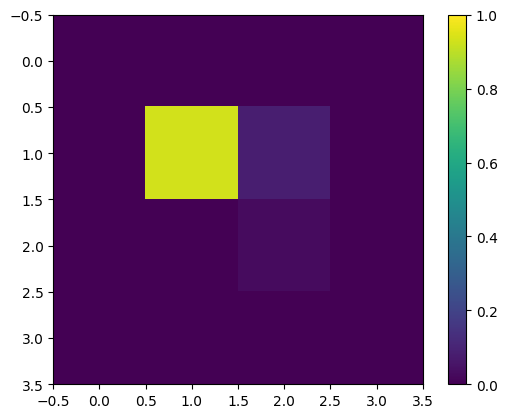

In [ ]:
print(y_training_07[0])
plt.imshow(x_train_sized[0,:,:,0], vmin=0, vmax=1)
plt.colorbar() 

In [ ]:
def remove_contradicting(xs, ys):
    mapping = collections.defaultdict(set)
    for x,y in zip(xs,ys):
       mapping[tuple(x.flatten())].add(y)
    
    new_x = []
    new_y = []
    for x,y in zip(xs, ys):
      labels = mapping[tuple(x.flatten())]
      if len(labels) == 1:
          new_x.append(x)
          new_y.append(list(labels)[0])
      else:
          pass
    
    num_0 = sum(1 for value in mapping.values() if True in value)
    num_7 = sum(1 for value in mapping.values() if False in value)
    num_both = sum(1 for value in mapping.values() if len(value) == 2)

    print("Number of unique images in the dataset:", len(mapping.values()))
    print("Number of zeroes: ", num_0)
    print("Number of sevens: ", num_7)
    print("Total Number of contradictory images: ", num_both)
    print()
    print("Initial number of examples in the datset: ", len(xs))
    print("Remaining non-contradictory examples for use: ", len(new_x))
    
    return np.array(new_x), np.array(new_y)

In [ ]:
x_training_nocont, y_training_nocontt = remove_contradicting(x_train_sized, y_training_07)

Number of unique images in the dataset: 10491
Number of zeroes:  5032
Number of sevens:  5585
Total Number of contradictory images:  126

Initial number of examples in the datset:  12188
Remaining non-contradictory examples for use:  11051


In [ ]:
Threshold = 0.5
x_train_binary = np.array(x_training_nocont > Threshold, dtype=np.float32)
x_test_binary = np.array(x_test_sized > Threshold, dtype=np.float32)

In [ ]:
len(x_train_binary)

11051

In [ ]:
 x_train_binary_nocont,y_training_nocont = remove_contradicting(x_train_binary, y_training_nocontt)

Number of unique images in the dataset: 169
Number of zeroes:  121
Number of sevens:  105
Total Number of contradictory images:  57

Initial number of examples in the datset:  11051
Remaining non-contradictory examples for use:  878


In [ ]:

def convert_to_circuit(image):
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4, 4)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
        if value:
            circuit.append(cirq.X(qubits[i]))
    return circuit


x_train_circuit = [convert_to_circuit(x) for x in x_train_binary_nocont]
x_test_circuit = [convert_to_circuit(x) for x in x_test_binary]

In [ ]:
len(x_train_circuit)

878

In [ ]:
binary_image = x_train_binary[0,:,:,0]
index = np.array(np.where(binary_image)).T
index

array([[1, 1]])

In [ ]:
x_train_circuit_tensor = tfq.convert_to_tensor(x_train_circuit)
x_test_circuit_tensor = tfq.convert_to_tensor(x_test_circuit)

In [ ]:
x_train_binary[0].shape

(4, 4, 1)

In [ ]:
class CircuitLayerBuilder():
    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout
    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

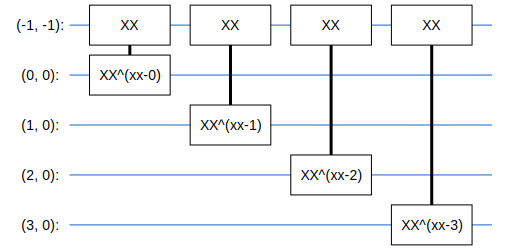

In [ ]:
demo_circuit = CircuitLayerBuilder(data_qubits = cirq.GridQubit.rect(4,1),
                                   readout=cirq.GridQubit(-1,-1))
circ = cirq.Circuit()
demo_circuit.add_layer(circ, gate = cirq.XX, prefix='xx')
SVGCircuit(circ)

In [ ]:
def create_quantum_model():
    data_qubits = cirq.GridQubit.rect(4, 4)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()
    
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))
    
    builder = CircuitLayerBuilder(
        data_qubits = data_qubits,
        readout=readout)

    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    circuit.append(cirq.H(readout))
    circuit.append(cirq.measure(readout))

    return circuit, cirq.Z(readout)

In [ ]:
model_circuit, model_readout = create_quantum_model()

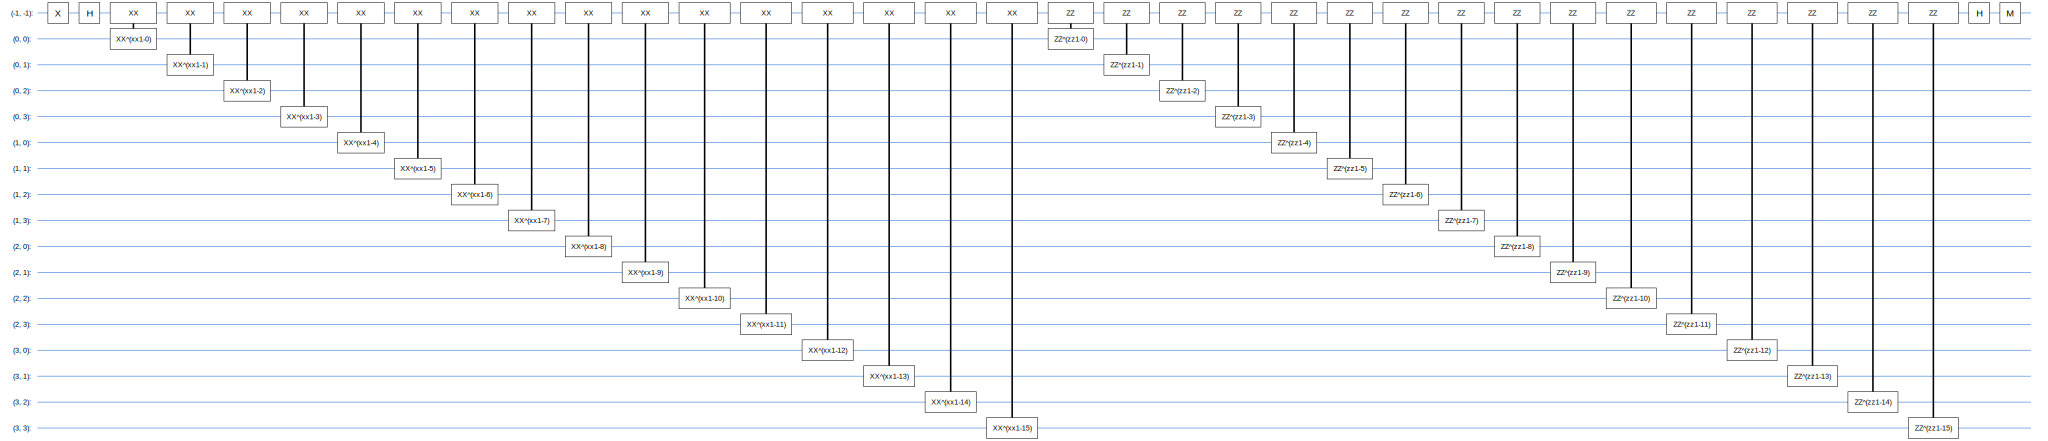

In [ ]:
SVGCircuit(model_circuit)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    tfq.layers.PQC(model_circuit, model_readout),    
])

In [ ]:
y_training_hinge = 2.0*y_training_nocont-1.0
y_testing_hinge = 2.0*y_testing_07-1.0

In [ ]:
y_testing_07

array([False,  True,  True, ...,  True, False,  True])

In [ ]:
def measure_hinge_accuracy(y_true, y_predicted):
    y_true = tf.squeeze(y_true) > 0.0
    y_predicted = tf.squeeze(y_predicted) > 0.0
    result = tf.cast(y_true == y_predicted, tf.float32)

    return tf.reduce_mean(result)

In [ ]:
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=[measure_hinge_accuracy])

/usr/local/lib/python3.9/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pqc (PQC)                   (None, 1)                 32        
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
EPOCHS = 10
BATCH_SIZE = 32

NUM_EXAMPLES = len(x_train_circuit_tensor)

In [ ]:
len(x_test_circuit_tensor)

2008

In [ ]:
x_train_circuit_tensor_subset = x_train_circuit_tensor[:NUM_EXAMPLES]
y_train_hinge_subset = y_training_hinge[:NUM_EXAMPLES]

In [ ]:
len(x_train_circuit_tensor_subset)

878

In [ ]:
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
 
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [ ]:
import time
history = LossHistory()
begin_time = time.time()
qnn_history = model.fit(
      x_train_circuit_tensor_subset, y_train_hinge_subset,
      batch_size=32,
      epochs=EPOCHS,
      verbose=1,
      validation_data=(x_test_circuit_tensor, y_testing_hinge),
      callbacks=[history])
end_time = time.time()
print('the cost time is '+str(end_time-begin_time))
QNN_results= model.evaluate(x_test_circuit_tensor, y_testing_07)

Epoch 1/10
28/28 [==============================] - 101s 4s/step - loss: 0.8583 - measure_hinge_accuracy: 0.6725 - val_loss: 0.8044 - val_measure_hinge_accuracy: 0.7145
Epoch 2/10
28/28 [==============================] - 86s 3s/step - loss: 0.4708 - measure_hinge_accuracy: 0.8717 - val_loss: 1.1470 - val_measure_hinge_accuracy: 0.5559
Epoch 3/10
28/28 [==============================] - 86s 3s/step - loss: 0.1968 - measure_hinge_accuracy: 0.9506 - val_loss: 1.3817 - val_measure_hinge_accuracy: 0.5432
Epoch 4/10
28/28 [==============================] - 82s 3s/step - loss: 0.1334 - measure_hinge_accuracy: 0.9777 - val_loss: 1.1521 - val_measure_hinge_accuracy: 0.5893
Epoch 5/10
28/28 [==============================] - 88s 3s/step - loss: 0.1173 - measure_hinge_accuracy: 0.9799 - val_loss: 1.0883 - val_measure_hinge_accuracy: 0.6518
Epoch 6/10
28/28 [==============================] - 86s 3s/step - loss: 0.1030 - measure_hinge_accuracy: 0.9833 - val_loss: 1.1171 - val_measure_hinge_accuracy

In [ ]:
loss = qnn_history.history['loss']
hinge_acc = qnn_history.history['measure_hinge_accuracy']

val_hinge_acc = qnn_history.history['val_measure_hinge_accuracy']
val_loss = qnn_history.history['val_loss']

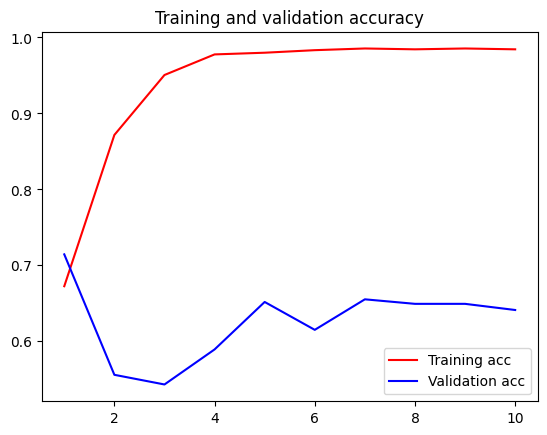

In [ ]:
epochs_arr = range(1, len(hinge_acc) + 1)
plt.plot(epochs_arr, hinge_acc, 'r', label='Training acc')
plt.plot(epochs_arr, val_hinge_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

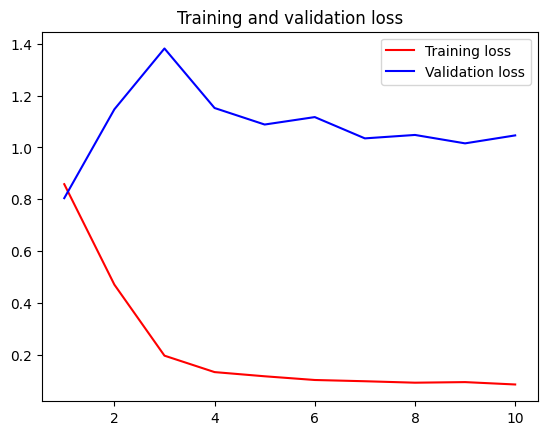

In [ ]:
plt.plot(epochs_arr, loss, 'r', label='Training loss')
plt.plot(epochs_arr, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# import time
# history = LossHistory()
# begin_time = time.time()
# qnn_history = model.fit(
#       x_train_circuit_tensor_subset[:200], y_train_hinge_subset[:200],
#       batch_size=20,
#       epochs=EPOCHS,
#       verbose=1,
#       validation_data=(x_test_circuit_tensor[:100], y_testing_hinge[:100]),
#       callbacks=[history])
# end_time = time.time()
# print('the cost time is '+str(end_time-begin_time))

In [ ]:
QNN_results

[0.3527505695819855, 0.6412037014961243]

In [ ]:
len(x_train_binary)

11051

In [ ]:
len(x_test_binary)

2008

In [ ]:
len( y_training_07)

12188

In [ ]:
len(y_training_nocont)

878

In [ ]:
model.evaluate(x_test_circuit_tensor, y_testing_07)

63/63 [==============================] - 28s 434ms/step - loss: 0.3528 - measure_hinge_accuracy: 0.6412


[0.3527505695819855, 0.6412037014961243]

# Classical CNN Model

In [ ]:
# def CNN_model():
#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
#     model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#     model.add(tf.keras.layers.Dropout(0.25))
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(128, activation='relu'))
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Dense(1))
#     return model


# model = CNN_model()
# model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=['accuracy'])

# model.summary()

In [ ]:
def CNN_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(28,28,1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1))
    return model


model = CNN_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [ ]:
history = LossHistory()
begin_time = time.time()
model.fit(x_training_07,
          y_training_07,
          batch_size=128,
          epochs=5,
          verbose=1,
          validation_data=(x_testing_07, y_testing_07),
          callbacks=[history])
end_time = time.time()
print('the cost time is '+str(end_time-begin_time))
CNN_results = model.evaluate(x_testing_07, y_testing_07)

Epoch 1/5
96/96 [==============================] - 10s 14ms/step - loss: 0.0345 - accuracy: 0.9879 - val_loss: 0.0132 - val_accuracy: 0.9955
Epoch 2/5
96/96 [==============================] - 1s 11ms/step - loss: 0.0047 - accuracy: 0.9981 - val_loss: 0.0092 - val_accuracy: 0.9970
Epoch 3/5
96/96 [==============================] - 1s 11ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0144 - val_accuracy: 0.9970
Epoch 4/5
96/96 [==============================] - 1s 11ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0057 - val_accuracy: 0.9990
Epoch 5/5
96/96 [==============================] - 1s 11ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0072 - val_accuracy: 0.9985
the cost time is 14.7696213722229
63/63 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9985


In [ ]:
len(history.losses)

480

# Classical ANN Model

In [ ]:
def ANN_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(4,4,1)))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model


model = ANN_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train_binary,
          y_training_nocontt,
          batch_size=128,
          epochs=20,
          verbose=2,
          validation_data=(x_test_binary, y_testing_07))

ANN_results = model.evaluate(x_test_binary, y_testing_07)

Epoch 1/20
87/87 - 1s - loss: 0.7105 - accuracy: 0.5205 - val_loss: 0.6957 - val_accuracy: 0.5120 - 1s/epoch - 13ms/step
Epoch 2/20
87/87 - 0s - loss: 0.6831 - accuracy: 0.5247 - val_loss: 0.6716 - val_accuracy: 0.5120 - 353ms/epoch - 4ms/step
Epoch 3/20
87/87 - 0s - loss: 0.6586 - accuracy: 0.5247 - val_loss: 0.6465 - val_accuracy: 0.5120 - 407ms/epoch - 5ms/step
Epoch 4/20
87/87 - 0s - loss: 0.6326 - accuracy: 0.5247 - val_loss: 0.6185 - val_accuracy: 0.5120 - 301ms/epoch - 3ms/step
Epoch 5/20
87/87 - 0s - loss: 0.6048 - accuracy: 0.5361 - val_loss: 0.5895 - val_accuracy: 0.5528 - 233ms/epoch - 3ms/step
Epoch 6/20
87/87 - 0s - loss: 0.5764 - accuracy: 0.5718 - val_loss: 0.5592 - val_accuracy: 0.5772 - 257ms/epoch - 3ms/step
Epoch 7/20
87/87 - 0s - loss: 0.5484 - accuracy: 0.6481 - val_loss: 0.5316 - val_accuracy: 0.7032 - 290ms/epoch - 3ms/step
Epoch 8/20
87/87 - 0s - loss: 0.5241 - accuracy: 0.7084 - val_loss: 0.5080 - val_accuracy: 0.7112 - 249ms/epoch - 3ms/step
Epoch 9/20
87/87 -

In [ ]:
ANN_results[1]

0.791832685470581

<BarContainer object of 3 artists>

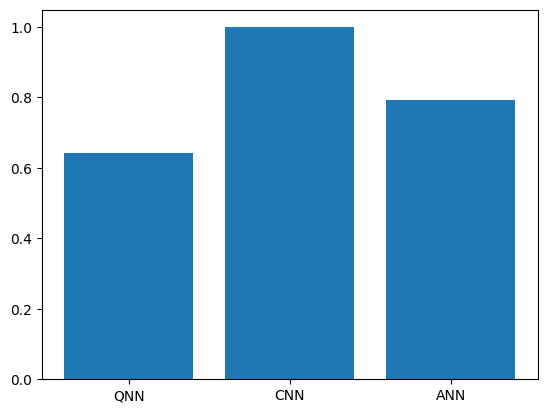

In [ ]:
QNN_accuracy = QNN_results[1]
CNN_accuracy = CNN_results[1]
ANN_accuracy = ANN_results[1]

plt.bar(["QNN", "CNN", "ANN"],[QNN_accuracy, CNN_accuracy, ANN_accuracy])

# QCNN

In [ ]:
def cluster_state_circuit(bits):
    circuit = cirq.Circuit()
    circuit.append(cirq.H.on_each(bits))
    for this_bit, next_bit in zip(bits, bits[1:] + [bits[0]]):
        circuit.append(cirq.CZ(this_bit, next_bit))
    return circuit

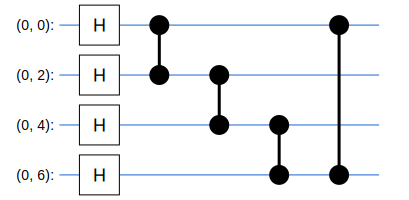

In [ ]:
SVGCircuit(cluster_state_circuit(cirq.GridQubit.rect(1, 8)[0::2]))

In [ ]:
def one_qubit_unitary(bit, symbols):
    return cirq.Circuit(
        cirq.X(bit)**symbols[0],
        cirq.Y(bit)**symbols[1],
        cirq.Z(bit)**symbols[2])


def two_qubit_unitary(bits, symbols):
    circuit = cirq.Circuit()
    circuit += one_qubit_unitary(bits[0], symbols[0:3])
    circuit += one_qubit_unitary(bits[1], symbols[3:6])
    circuit += [cirq.ZZ(*bits)**symbols[7]]
    circuit += [cirq.YY(*bits)**symbols[8]]
    circuit += [cirq.XX(*bits)**symbols[9]]
    circuit += one_qubit_unitary(bits[0], symbols[9:12])
    circuit += one_qubit_unitary(bits[1], symbols[12:])
    return circuit


def two_qubit_pool(source_qubit, sink_qubit, symbols):
    pool_circuit = cirq.Circuit()
    sink_basis_selector = one_qubit_unitary(sink_qubit, symbols[0:3])
    source_basis_selector = one_qubit_unitary(source_qubit, symbols[3:6])
    pool_circuit.append(sink_basis_selector)
    pool_circuit.append(source_basis_selector)
    pool_circuit.append(cirq.CNOT(control=source_qubit, target=sink_qubit))
    pool_circuit.append(sink_basis_selector**-1)
    return pool_circuit

In [ ]:
def quantum_conv_circuit(bits, symbols):
    circuit = cirq.Circuit()
    for first, second in zip(bits[0::2], bits[1::2]):
        circuit += two_qubit_unitary([first, second], symbols)
    for first, second in zip(bits[1::2], bits[2::2] + [bits[0]]):
        circuit += two_qubit_unitary([first, second], symbols)
    return circuit

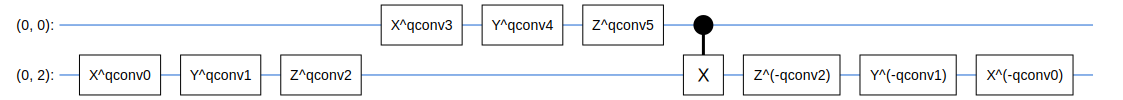

In [ ]:
qubits=cirq.GridQubit.rect(1, 8)[0::2][0]
symbols = sympy.symbols('qconv0:63')
xxx=two_qubit_pool(cirq.GridQubit.rect(1, 8)[0::2][0],cirq.GridQubit.rect(1, 8)[0::2][1], symbols[0:12])
SVGCircuit(xxx)

In [ ]:
def quantum_pool_circuit(source_bits, sink_bits, symbols):
    circuit = cirq.Circuit()
    for source, sink in zip(source_bits, sink_bits):
        circuit += two_qubit_pool(source, sink, symbols)
    return circuit

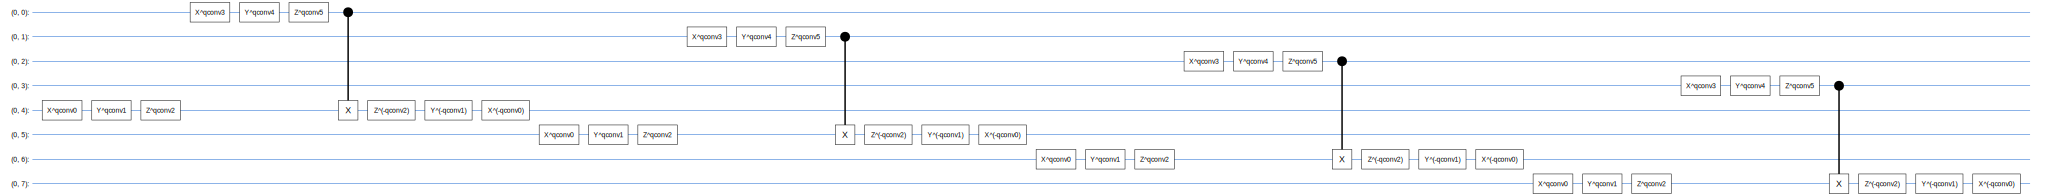

In [ ]:
qubits=cirq.GridQubit.rect(1, 8)[0::2][0]
symbols = sympy.symbols('qconv0:63')
xxx=quantum_pool_circuit(cirq.GridQubit.rect(1, 8)[:4],cirq.GridQubit.rect(1, 8)[4:], symbols[0:12])
SVGCircuit(xxx)

In [ ]:
qubits=cirq.GridQubit.rect(1, 8)
symbols = sympy.symbols('qconv0:63')
xxx=quantum_conv_circuit(qubits, symbols[0:15])

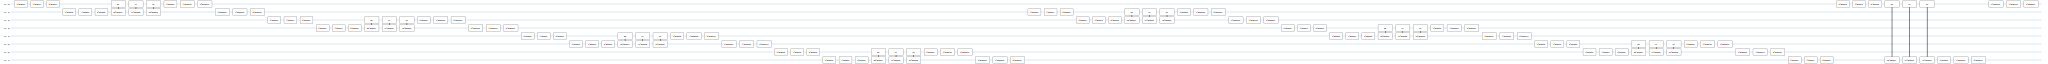

In [ ]:
SVGCircuit(xxx)

In [ ]:
def quantum_conv_circuit(bits, symbols):
    circuit = cirq.Circuit()
    for first, second in zip(bits[0::2], bits[1::2]):
        circuit += two_qubit_unitary([first, second], symbols)
    for first, second in zip(bits[1::2], bits[2::2] + [bits[0]]):
        circuit += two_qubit_unitary([first, second], symbols)
    return circuit

In [ ]:
cirq.GridQubit.rect(1, 8)[0::2][0]

cirq.GridQubit(0, 0)

In [ ]:
def quantum_pool_circuit(source_bits, sink_bits, symbols):
    circuit = cirq.Circuit()
    for source, sink in zip(source_bits, sink_bits):
        circuit += two_qubit_pool(source, sink, symbols)
    return circuit

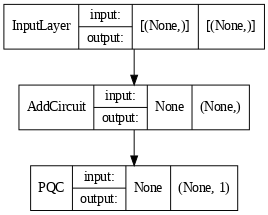

In [ ]:
def create_model_circuit(qubits):
    model_circuit = cirq.Circuit()
    symbols = sympy.symbols('qconv0:21')
    model_circuit += quantum_conv_circuit(qubits, symbols[0:15])
    model_circuit += quantum_pool_circuit(qubits[:4], qubits[4:],
                                          symbols[15:21])
    return model_circuit


cluster_state_bits = cirq.GridQubit.rect(1, 8)
readout_operators = cirq.Z(cluster_state_bits[-1])

excitation_input = tf.keras.Input(shape=(), dtype=tf.dtypes.string)
cluster_state = tfq.layers.AddCircuit()(
    excitation_input, prepend=cluster_state_circuit(cluster_state_bits))

quantum_model = tfq.layers.PQC(create_model_circuit(cluster_state_bits),
                               readout_operators)(cluster_state)

qcnn_model = tf.keras.Model(inputs=[excitation_input], outputs=[quantum_model])

tf.keras.utils.plot_model(qcnn_model,
                          show_shapes=True,
                          show_layer_names=False,
                          dpi=70)

In [ ]:
qcnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 add_circuit_1 (AddCircuit)  (None,)                   0         
                                                                 
 pqc_1 (PQC)                 (None, 1)                 20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def generate_data(qubits):
    n_rounds = 20  # Produces n_rounds * n_qubits datapoints.
    excitations = []
    labels = []
    for n in range(n_rounds):
        for bit in qubits:
            rng = np.random.uniform(-np.pi, np.pi)
            excitations.append(cirq.Circuit(cirq.rx(rng)(bit)))
            labels.append(1 if (-np.pi / 2) <= rng <= (np.pi / 2) else -1)

    split_ind = int(len(excitations) * 0.7)
    train_excitations = excitations[:split_ind]
    test_excitations = excitations[split_ind:]

    train_labels = labels[:split_ind]
    test_labels = labels[split_ind:]

    return tfq.convert_to_tensor(train_excitations), np.array(train_labels), \
        tfq.convert_to_tensor(test_excitations), np.array(test_labels)

In [ ]:
train_excitations, train_labels, test_excitations, test_labels = generate_data(cluster_state_bits)

In [ ]:
len(x_train_circuit_tensor)

878

In [ ]:
len(y_train_hinge_subset)

878

In [ ]:
qcnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     loss=tf.losses.mse,
                     metrics=[measure_hinge_accuracy])
begin_time = time.time()
qcnn_history = qcnn_model.fit(x= x_train_circuit_tensor_subset,
                                  y=y_train_hinge_subset,
                                  batch_size=48,
                                  epochs=20,
                                  verbose=1,
                                  validation_data=(x_test_circuit_tensor,
                                                   y_testing_07))
end_time = time.time()
print('the cost time is '+str(end_time-begin_time))

Epoch 1/20
19/19 [==============================] - 23s 1s/step - loss: 0.9553 - measure_hinge_accuracy: 0.6206 - val_loss: 0.6001 - val_measure_hinge_accuracy: 0.5748
Epoch 2/20
19/19 [==============================] - 19s 1s/step - loss: 0.9426 - measure_hinge_accuracy: 0.6209 - val_loss: 0.6140 - val_measure_hinge_accuracy: 0.5301
Epoch 3/20
19/19 [==============================] - 19s 1s/step - loss: 0.9374 - measure_hinge_accuracy: 0.6283 - val_loss: 0.5951 - val_measure_hinge_accuracy: 0.5748
Epoch 4/20
19/19 [==============================] - 19s 1s/step - loss: 0.9552 - measure_hinge_accuracy: 0.6162 - val_loss: 0.5853 - val_measure_hinge_accuracy: 0.5723
Epoch 5/20
19/19 [==============================] - 19s 1s/step - loss: 0.9242 - measure_hinge_accuracy: 0.6320 - val_loss: 0.6674 - val_measure_hinge_accuracy: 0.5723
Epoch 6/20
19/19 [==============================] - 19s 1s/step - loss: 0.9269 - measure_hinge_accuracy: 0.6306 - val_loss: 0.6485 - val_measure_hinge_accuracy:

In [ ]:
loss = qnn_history.history['loss']
hinge_acc = qnn_history.history['measure_hinge_accuracy']

val_hinge_acc = qnn_history.history['val_measure_hinge_accuracy']
val_loss = qnn_history.history['val_loss']

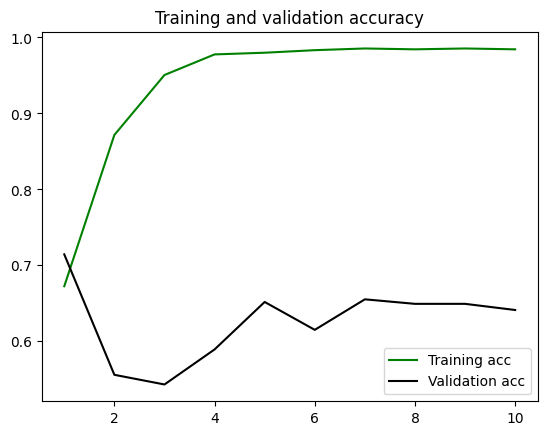

In [ ]:
epochs = range(1, len(hinge_acc) + 1)

plt.plot(epochs, hinge_acc, 'g', label='Training acc')
plt.plot(epochs, val_hinge_acc, 'black', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

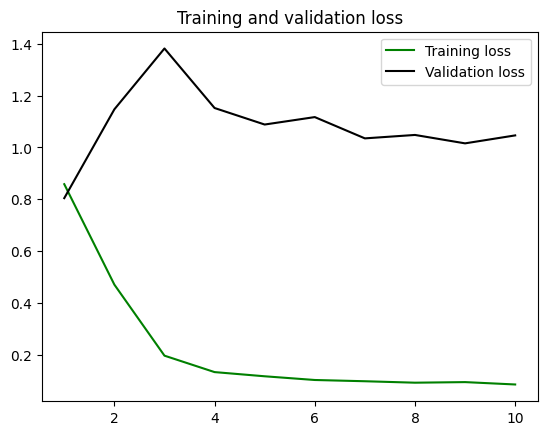

In [ ]:
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'black', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
qcnn_model_results = qcnn_model.evaluate(x_test_circuit_tensor, y_testing_07)

63/63 [==============================] - 7s 108ms/step - loss: 0.6946 - measure_hinge_accuracy: 0.5670


In [ ]:
qcnn_model_results

[0.6946132183074951, 0.5669642686843872]

<BarContainer object of 3 artists>

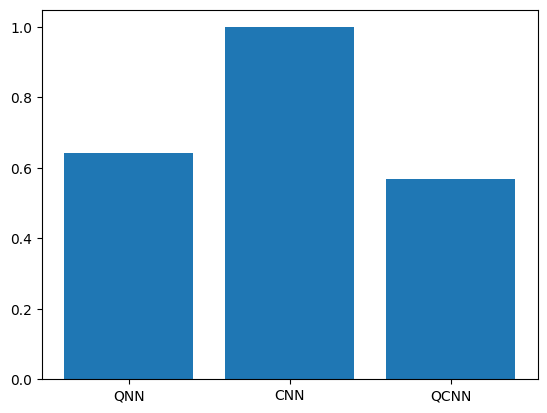

In [ ]:
QNN_accuracy = QNN_results[1]
CNN_accuracy = CNN_results[1]
QCNN_accuracy= qcnn_model_results[1]
plt.bar(["QNN", "CNN",  "QCNN"],[QNN_accuracy, CNN_accuracy,QCNN_accuracy])